In [1]:
import json
from collections import Counter
from datetime import datetime
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    review = pd.read_json("E:/nethari/Downloads/YEAR 3/Deep Learning/dataset files/yelp_academic_dataset_review.json", chunksize=20000, lines=True)
    review_chunk = next(review)
    print(review_chunk.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

In [3]:
# Assuming review_chunk is already a DataFrame
review_chunk = review_chunk.drop(['review_id', 'useful', 'funny', 'cool', 'text', 'date'], axis=1)
print(review_chunk.head())

                  user_id             business_id  stars
0  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw      3
1  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ      5
2  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A      3
3  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA      5
4  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ      4


In [4]:
# Identifying and removing duplicate rows
duplicate_rows = review_chunk[review_chunk.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)
review_chunk = review_chunk.drop_duplicates()

Duplicate Rows except first occurrence:
                      user_id             business_id  stars
6184   A_TznMSVvVb6tbiGSvRQ_Q  G-zzByEfv2oqjcxYmPsjtA      5
6834   s9ZHbQAJs8brdlRcU36znw  9TJzfMc4gEKSUxfnGcj6dw      5
9839   LEyRdfEh33INkU_qK3-FAQ  xJyp6RLqNRv3tSu6njPKxQ      3
10392  pg0GI_LBpsX06a8eN7Ff5A  0qu0fNTOsSmuREYVIMPuIQ      4
11464  OxOEyH0OxKH4e3E6xqy9-Q  VgGITb54IIb1G0gSVt3gkw      4
12546  n3Gg5mIokBirc8s_unINnQ  y--UQiSyVPAmWjRkZ9tdPQ      4
12776  J8QE0UJ7yhHB9m_SomQAgA  TRtcUUdBfO9e7wBoJLH9NA      5
13674  FSb3LhuLAQVYK7Tj82Jzog  XdcWCEhxUtBcSyn-DiidPw      1
13745  mYCvAkZ1-67z9PAGdlINng  54NQk8KBYd8lMD3bLVbrAQ      1
14694  y4EOqN--vgyMGm5Byj_HIQ  5NSA0-aOjOVQWJYIr8hA-Q      5
15091  2anfbsmeoqeMYCiNwUow9Q  PY9GRfzr4nTZeINf346QOw      5
15213  _BcWyKQL16ndpBdggh2kNA  h1qdksqlwGpmp_Id8j5CXQ      4
15493  zcYZgNeJHpKCSBRwh6WskQ  lEOxwatxwXaCi8lPUTFKRQ      5
15704  0YyF7OrD2VEUVUiYmKZ8MA  NnlQhXtuVOVjUFYB1Hqp8Q      5
16647  Jt3GylPuH64uA3zTdbMdCg  nl_La1sCrZG0xq

In [5]:
# Displaying DataFrame information
review_chunk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19981 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      19981 non-null  object
 1   business_id  19981 non-null  object
 2   stars        19981 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 624.4+ KB


In [6]:
# Reading the JSON file in chunks
business = pd.read_json("E:/nethari/Downloads/YEAR 3/Deep Learning/dataset files/yelp_academic_dataset_business.json", chunksize=10000, lines=True)
business_chunk = next(business)
print(business_chunk.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [7]:
# Assuming you want to keep the business's ID, name, stars rating, and number of reviews
# Dropping other unnecessary columns
business_chunk=business_chunk.drop(['address','city','state','postal_code','longitude','latitude','is_open','attributes','categories','hours'], axis=1)
print(business_chunk.head())

              business_id                      name  stars  review_count
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ    5.0             7
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store    3.0            15
2  tUFrWirKiKi_TAnsVWINQQ                    Target    3.5            22
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries    4.0            80
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery    4.5            13


In [8]:
min_user_id = review_chunk['user_id'].min()
min_user_id

'--4AjktZiHowEIBCMd4CZA'

In [9]:
# Create a mapping between string IDs and numerical IDs
user_id_unique = review_chunk['user_id'].unique()
user_id_mapping = {user_id: idx for idx, user_id in enumerate(user_id_unique)}

# Add a new column with numerical user IDs
review_chunk['user_id_new'] = review_chunk['user_id'].map(user_id_mapping)

# Create a mapping between string IDs and numerical IDs
busi_id_unique = review_chunk['business_id'].unique()
busi_id_mapping = {busi_id: idx for idx, busi_id in enumerate(busi_id_unique)}
# Add a new column with numerical user IDs
review_chunk['busi_id_new'] = review_chunk['business_id'].map(busi_id_mapping)

In [10]:
#remove default indexes
review_chunk = review_chunk.reset_index(drop=True)
review_chunk.head()

,user_id,business_id,stars,user_id_new,busi_id_new
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,1
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2,2
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,3,3
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,4,4


In [11]:
data_df=review_chunk.drop(['user_id','business_id'], axis=1)
data_df

,stars,user_id_new,busi_id_new
0,3,0,0
1,5,1,1
2,3,2,2
3,5,3,3
4,4,4,4
...,...,...,...
19976,1,18242,3348
19977,4,18243,5548
19978,2,18244,61
19979,2,6786,5549


In [12]:
min_user_id = data_df['user_id_new'].min()
max_user_id = data_df['user_id_new'].max()
min_busi_id = data_df['busi_id_new'].min()
max_busi_id = data_df['busi_id_new'].max()

In [13]:
print('min_user_id:', min_user_id)
print('max_user_id:', max_user_id)
print('min_busi_id:', min_busi_id)
print('max_busi_id:', max_busi_id)

min_user_id: 0
max_user_id: 18245
min_busi_id: 0
max_busi_id: 5549


In [14]:
data_df['stars'].describe()

count    19981.000000
mean         3.852510
std          1.349013
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    data_df, test_size=0.2, random_state=42)

print("testing data: ")
test.head()

testing data: 


,stars,user_id_new,busi_id_new
4013,1,3914,2301
2085,4,2053,1433
4772,1,4631,608
9109,5,8657,3738
19298,5,17661,757


In [16]:
print("training data: ")
train.head()

training data: 


,stars,user_id_new,busi_id_new
16590,1,15279,5087
19927,4,18201,2173
9658,5,9162,222
8132,4,7760,3
16024,4,14781,1097


In [17]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from keras.optimizers import Adam

def regressionModel(embedding_size = 64, classification = False):

    user_input = Input(shape=[1], name='user_id_new')
    embedding_user = Embedding(output_dim=embedding_size, input_dim=max_user_id + 1, input_length=1)(user_input)
    user_vec = Flatten()(embedding_user)

    business_input = Input(shape=[1], name='busi_id_new')
    embedding_busi = Embedding(output_dim=embedding_size, input_dim=max_busi_id + 1, input_length=1)(business_input)
    busi_vec = Flatten()(embedding_busi)

    concatenated = Concatenate()([user_vec, busi_vec])

    #add fully connected layers

    layer1 = Dense(128, activation='relu')(concatenated)
    layer2 = Dense(32, activation='relu')(layer1)
    output = Dense(1)(layer2)

    #creating model and compile
    model1 = Model(inputs=[user_input, business_input], outputs=output)
    model1.compile(optimizer="adam", loss='mse')

    return model1

In [18]:
Model1 = regressionModel()

In [19]:
history = Model1.fit([train.user_id_new,train.busi_id_new],train.stars,batch_size=64,epochs=10,verbose=1)

Epoch 1/10
250/250 [==============================] - 5s 18ms/step - loss: 3.7749
Epoch 2/10
250/250 [==============================] - 4s 18ms/step - loss: 0.9693
Epoch 3/10
250/250 [==============================] - 4s 17ms/step - loss: 0.3754
Epoch 4/10
250/250 [==============================] - 5s 19ms/step - loss: 0.1680
Epoch 5/10
250/250 [==============================] - 5s 19ms/step - loss: 0.1163
Epoch 6/10
250/250 [==============================] - 4s 18ms/step - loss: 0.0900
Epoch 7/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0773
Epoch 8/10
250/250 [==============================] - 6s 23ms/step - loss: 0.0688
Epoch 9/10
250/250 [==============================] - 4s 18ms/step - loss: 0.0631
Epoch 10/10
250/250 [==============================] - 4s 17ms/step - loss: 0.0597


Text(0, 0.5, 'Training Error')

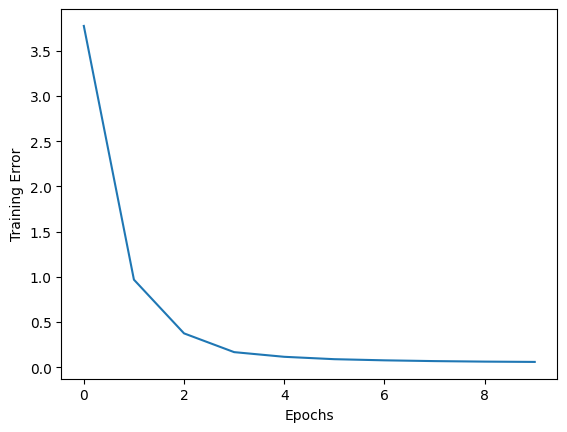

In [22]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Error')

In [23]:
Model1.evaluate([test.user_id_new, test.busi_id_new], test.stars)

125/125 [==============================] - 0s 1ms/step - loss: 1.8950


1.8949832916259766

In [24]:
test_loss = Model1.evaluate([test.user_id_new, test.busi_id_new], test.stars)
print('Test loss:', test_loss)

125/125 [==============================] - 0s 3ms/step - loss: 1.8950
Test loss: 1.8949832916259766


In [25]:
predictions = Model1.predict([test.user_id_new.head(10), test.busi_id_new.head(10)])

for i in range(10):
    print(f"Prediction: {predictions[i][0]:.4f}, Actual: {test.stars.iloc[i]}")

1/1 [==============================] - 0s 125ms/step
Prediction: 4.5065, Actual: 1
Prediction: 3.2618, Actual: 4
Prediction: 2.7186, Actual: 1
Prediction: 4.3534, Actual: 5
Prediction: 4.3832, Actual: 5
Prediction: 3.4287, Actual: 4
Prediction: 3.4200, Actual: 5
Prediction: 3.5288, Actual: 5
Prediction: 3.3647, Actual: 1
Prediction: 4.3905, Actual: 5


In [27]:
# weights and shape
weights = Model1.get_weights()
[w.shape for w in weights]

user_embeddings = weights[0]
business_embeddings = weights[1]

busi_id = 2173
print(f"Name of busi_id={busi_id}: {business_chunk['name'][busi_id]}")

Name of busi_id=2173: The UPS Store


In [28]:
print(f"Embedding vector for item_id={busi_id}")
print(business_embeddings[busi_id])
print("shape:", business_embeddings[busi_id].shape)

Embedding vector for item_id=2173
[-0.06540534 -0.02048551  0.0224658   0.01228325  0.03175329 -0.01263599
  0.0248579  -0.03101914 -0.00149056 -0.01487393  0.08927875  0.00206502
 -0.05174847 -0.06764892 -0.04401371  0.02650324  0.06207179 -0.01211227
 -0.00113803  0.07380989 -0.01654049  0.08911347 -0.02200315 -0.04091039
 -0.03913264  0.04652144  0.01010148 -0.03280599 -0.01372285 -0.06992868
  0.03080054 -0.01593287  0.07307761 -0.0069202   0.01086213  0.01093733
 -0.08032145 -0.08042031  0.06918138 -0.05419605  0.06118589  0.03372771
  0.05321841 -0.00469472 -0.03464585 -0.03312852  0.04961294 -0.05473479
  0.01024299 -0.01328982  0.05489531 -0.05657009  0.07056072 -0.02261204
  0.00628435 -0.04162757  0.04839443 -0.05151936  0.02269403 -0.05855422
  0.05678671  0.0400073  -0.06020952 -0.02138692]
shape: (64,)


In [29]:
import numpy as np

EPSILON = 1e-07 

def cosine_similarities(busi_id, business_embeddings):
    # Compute similarities between busi_id and all business embeddings
    query_vector = business_embeddings[busi_id]
    dot_products = np.dot(business_embeddings, query_vector)
    
    query_vector_norm = np.linalg.norm(query_vector)
    all_item_norms = np.linalg.norm(business_embeddings, axis=1)
    
    norm_products = query_vector_norm * all_item_norms
    cosine_similarities = dot_products / (norm_products + EPSILON)
    
    return cosine_similarities

# Assume business_embeddings is a 2D numpy array with one embedding per business
similarities = cosine_similarities(2173, business_embeddings)
print(similarities)

[ 0.35637018 -0.4486015   0.27750453 ...  0.10441338 -0.28096458
  0.01475579]


In [30]:
def most_similar(item_id, item_embeddings, titles, top_n=30):
    # Calculate cosine similarities
    sims = cosine_similarities(item_id, item_embeddings)
    # Sort the similarities and reverse to get largest values first
    sorted_indexes = np.argsort(sims)[::-1]
    # Get the indices of the top_n most similar items
    idxs = sorted_indexes[:top_n]
    # Return a list of tuples containing the index, title, and similarity score
    return [(idx, titles.iloc[idx], sims[idx]) for idx in idxs]

# Reset the index of business_df if necessary
business_chunk.reset_index(drop=True, inplace=True)

# Call the function
similar_items = most_similar(2173, business_embeddings, business_chunk["name"], top_n=10)
for idx, name, sim in similar_items:
    print(f"Index: {idx}, Name: {name}, Similarity: {sim}")

Index: 2173, Name: The UPS Store, Similarity: 0.9999992251396179
Index: 4668, Name: Just Cookies, Similarity: 0.6958628296852112
Index: 4236, Name: Sport Clips Haircuts of Cherry Hill, Similarity: 0.6752784252166748
Index: 4593, Name: GIANT Food Store, Similarity: 0.6680518984794617
Index: 5378, Name: AMF Clearwater Lanes, Similarity: 0.6672859787940979
Index: 1039, Name: Naoki Ramen, Similarity: 0.6636409163475037
Index: 3533, Name: Joel's Pizza Palace, Similarity: 0.66208416223526
Index: 5286, Name: Namaste Nail  Sanctuary, Similarity: 0.6584775447845459
Index: 2950, Name: La Spezia Italian Cafe, Similarity: 0.6544064879417419
Index: 4825, Name: Soboba Wood Co, Similarity: 0.6451371908187866


c:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

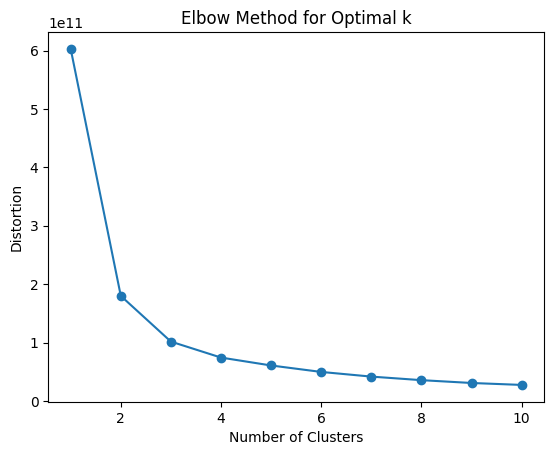

In [31]:
#Using elbow method to find no.of.clusters
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_df)
    inertia.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [32]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from sklearn.cluster import KMeans
import numpy as np

# Assuming you have user_count, item_count, and embedding_size defined
user_input = Input(shape=(1,))
busi_input = Input(shape=(1,))

embeddingUser = Embedding(max_user_id + 1, 64)(user_input)
embeddingBusi = Embedding(max_busi_id + 1, 64)(busi_input)

embedding_user = Flatten()(embeddingUser)
embedding_busi = Flatten()(embeddingBusi)

concatenate = Concatenate()([embedding_user, embedding_busi])

# Encoder
encoded = Dense(128, activation='relu')(concatenate)
encoded = Dense(64, activation='relu')(encoded)
embedding = Dense(32, activation='relu')(encoded) 

# Clustering layer
clustering = Dense(3, activation='softmax')(embedding)

model = Model(inputs=[user_input, busi_input], outputs=[clustering])

model.compile(optimizer='adam', loss='kld')
history = model.fit([train.user_id_new,train.busi_id_new], [np.ones_like(train.user_id_new)], epochs=10, batch_size=64)


Epoch 1/10
250/250 [==============================] - 4s 15ms/step - loss: 3.2958
Epoch 2/10
250/250 [==============================] - 4s 14ms/step - loss: 3.2958
Epoch 3/10
250/250 [==============================] - 3s 14ms/step - loss: 3.2958
Epoch 4/10
250/250 [==============================] - 4s 14ms/step - loss: 3.2958
Epoch 5/10
250/250 [==============================] - 4s 14ms/step - loss: 3.2958
Epoch 6/10
250/250 [==============================] - 4s 14ms/step - loss: 3.2958
Epoch 7/10
250/250 [==============================] - 4s 15ms/step - loss: 3.2958
Epoch 8/10
250/250 [==============================] - 4s 14ms/step - loss: 3.2958
Epoch 9/10
250/250 [==============================] - 4s 14ms/step - loss: 3.2958
Epoch 10/10
250/250 [==============================] - 4s 14ms/step - loss: 3.2958


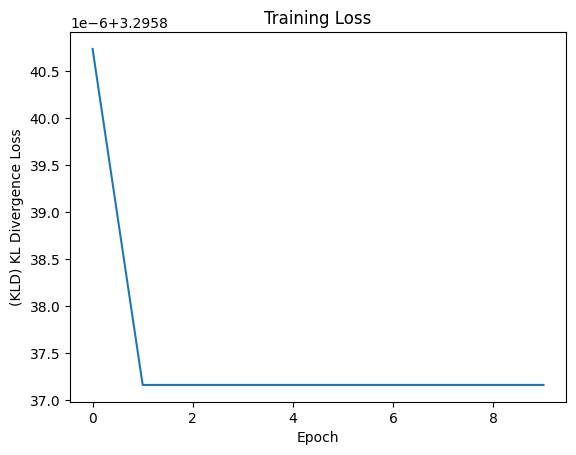

In [33]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('(KLD) KL Divergence Loss')
plt.show()

In [34]:
model.evaluate([test.user_id_new,test.busi_id_new],test.stars)

125/125 [==============================] - 0s 1ms/step - loss: 3.2958


3.295837163925171

In [39]:
# weights and shape
weights = model.get_weights()
[w.shape for w in weights]

user_embeddings = weights[0]
business_embeddings = weights[1]

busi_id = 2173
print(f"Name of busi_id={busi_id}: {business_chunk['name'][busi_id]}")

Name of busi_id=2173: The UPS Store


In [40]:
print(f"Embedding vector for item_id={busi_id}")
print(business_embeddings[busi_id])
print("shape:", business_embeddings[busi_id].shape)

Embedding vector for item_id=2173
[ 0.00336915  0.03382088 -0.02225907 -0.04552423  0.0127544   0.00016476
  0.02761318  0.01764726 -0.04107882 -0.04394245 -0.03975624  0.02155548
 -0.0410799   0.02006789  0.03169625  0.04077204 -0.04639386 -0.02088749
  0.02801395 -0.02167256  0.03202496 -0.03338622  0.02294649  0.02625067
  0.04697647 -0.01474352  0.01839184 -0.0115879  -0.04205221  0.0056429
 -0.03088009  0.02796885 -0.04870859  0.01336569  0.02533764 -0.04238813
  0.01301519 -0.02737478  0.01225328  0.04881129  0.03824056  0.02681243
  0.01151335 -0.01012227  0.02327927 -0.01094839  0.01392845  0.04267488
  0.00180239  0.00019686  0.01645489  0.0461598   0.03331089 -0.01922143
  0.01273824 -0.02074978  0.0290339  -0.03632006  0.03236147 -0.00673416
 -0.01728022  0.0538203   0.0382725   0.00646701]
shape: (64,)


In [41]:
EPSILON = 1e-07 
def cosine_similarities(busi_id, business_embeddings):
    """Compute similarities between item_id and all items embeddings"""
    query_vector = business_embeddings[busi_id]
    dot_products = business_embeddings @ query_vector

    query_vector_norm = np.linalg.norm(query_vector)
    all_item_norms = np.linalg.norm(business_embeddings, axis=1)
    norm_products = query_vector_norm * all_item_norms
    return dot_products / (norm_products + EPSILON)


similarities = cosine_similarities(2173, business_embeddings)
similarities

array([ 0.12071148,  0.10830651, -0.16879639, ..., -0.04562125,
        0.16879645,  0.01910457], dtype=float32)

In [42]:
def most_similar(item_id, item_embeddings, titles, top_n=30):
    # Calculate cosine similarities
    sims = cosine_similarities(item_id, item_embeddings)
    # Sort the similarities and reverse to get largest values first
    sorted_indexes = np.argsort(sims)[::-1]
    # Get the indices of the top_n most similar items
    idxs = sorted_indexes[:top_n]
    # Return a list of tuples containing the index, title, and similarity score
    return [(idx, titles.iloc[idx], sims[idx]) for idx in idxs]

# Reset the index of business_df if necessary
business_chunk.reset_index(drop=True, inplace=True)

# Call the function
similar_items = most_similar(2173, business_embeddings, business_chunk["name"], top_n=10)
for idx, name, sim in similar_items:
    print(f"Index: {idx}, Name: {name}, Similarity: {sim}")

Index: 2173, Name: The UPS Store, Similarity: 0.9999982118606567
Index: 1815, Name: The Bourse, Similarity: 0.4652004837989807
Index: 4830, Name: Grand View Apartments, Similarity: 0.44344255328178406
Index: 2387, Name: Trattoria Marcella, Similarity: 0.4284619092941284
Index: 498, Name: Best Western Cedar Park Inn, Similarity: 0.40628981590270996
Index: 1228, Name: Meal Prep Reno, Similarity: 0.38528239727020264
Index: 5380, Name: Curl Up Or Dye Hair Salon, Similarity: 0.3830169439315796
Index: 542, Name: Sherbrooke Liquor Store, Similarity: 0.3805807828903198
Index: 1659, Name: Lennys Subs, Similarity: 0.3714796304702759
Index: 2062, Name: Pick-n-Pull, Similarity: 0.36835581064224243
